## **Predict if a client is propense to commit fraud**

In [ ]:
data_file = '/content/drive/My Drive/Colab Notebooks/data.json'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Fix json
The json file needs some adjustments to be converted into a valida json structure.

In [ ]:
import json
with open(data_file, "r+") as f:
    old = f.read()
    f.seek(0)  # rewind

    f.write(old.replace('}\n{', '},{'))

    # Convert data to json to preprocess it
    f.seek(0)
    data_json = json.load(f)

    f.close

# Explote data
Let's see what kind of data can be found.

In [ ]:
data_json[1]

{'fraudulent': True,
 'customer': {'customerEmail': 'evansjeffery@yahoo.com',
  'customerPhone': '1-788-091-7546',
  'customerDevice': 'r0jpm7xaeqqa3kr6mzum',
  'customerIPAddress': '219.173.211.202',
  'customerBillingAddress': '356 Elizabeth Inlet Suite 120\nPort Joshuabury, NM 37681'},
 'orders': [{'orderId': 'nlghpa',
   'orderAmount': 45,
   'orderState': 'fulfilled',
   'orderShippingAddress': '898 Henry Ports\nNew Keithview, CA 95893-2497'},
  {'orderId': 'uw0eeb',
   'orderAmount': 23,
   'orderState': 'fulfilled',
   'orderShippingAddress': '356 Elizabeth Inlet Suite 120\nPort Joshuabury, NM 37681'},
  {'orderId': 'bn44oh',
   'orderAmount': 43,
   'orderState': 'fulfilled',
   'orderShippingAddress': '5093 Bryan Forks\nJoshuaton, FM 01565-9801'}],
 'paymentMethods': [{'paymentMethodId': 'y3xp697jx',
   'paymentMethodRegistrationFailure': True,
   'paymentMethodType': 'bitcoin',
   'paymentMethodProvider': 'VISA 16 digit',
   'paymentMethodIssuer': 'Solace Banks'},
  {'payment

### Some usefull data is
    1. The field fraudulent: it is going to be used to train a supervised learning algorithm to be able to recognize the clients with more probability to commit fraud.
    2. The domain of a customer's email
    3. If the email is valid or not
    4. The amount of money spent on the orders: average, median...
    5. The state of the orders: percentage of pending, fulfilled, and failed.
    6. Number of transactions
    7. Percentage of failed transactions
    8. Payment methods of failed transactions
    
    

In [ ]:
import pandas as pd
df = pd.read_json(data_file)
df.head()

,fraudulent,customer,orders,paymentMethods,transactions
0,False,"{'customerEmail': 'josephhoward@yahoo.com', 'c...","[{'orderId': 'vjbdvd', 'orderAmount': 18, 'ord...","[{'paymentMethodId': 'wt07xm68b', 'paymentMeth...","[{'transactionId': 'a9lcj51r', 'orderId': 'vjb..."
1,True,"{'customerEmail': 'evansjeffery@yahoo.com', 'c...","[{'orderId': 'nlghpa', 'orderAmount': 45, 'ord...","[{'paymentMethodId': 'y3xp697jx', 'paymentMeth...","[{'transactionId': '5mi94sfw', 'orderId': 'nlg..."
2,False,"{'customerEmail': 'andersonwilliam@yahoo.com',...","[{'orderId': 'yk34y2', 'orderAmount': 33, 'ord...","[{'paymentMethodId': '8pneoi03z', 'paymentMeth...","[{'transactionId': 'q3lyvbza', 'orderId': 'yk3..."
3,False,"{'customerEmail': 'rubenjuarez@yahoo.com', 'cu...","[{'orderId': 'fbz9ep', 'orderAmount': 34, 'ord...","[{'paymentMethodId': 'pdxjdwui4', 'paymentMeth...","[{'transactionId': 'vx4cjc27', 'orderId': 'fbz..."
4,True,"{'customerEmail': 'uchen@malone.com', 'custome...","[{'orderId': '56h7iw', 'orderAmount': 71, 'ord...","[{'paymentMethodId': 'w1i1zq3rg', 'paymentMeth...","[{'transactionId': 'q8j3dgni', 'orderId': '56h..."


import numpy as np
from google.colab import autoviz
df_4687581699704789007 = autoviz.get_df('df_4687581699704789007')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_4687581699704789007, *['fraudulent'], **{})
chart

# Preprocess data
The data is not very useful in this format. So we'll flatten the json structure before creating a new Data Frame

In [ ]:
from pandas import json_normalize

flattened_data = json_normalize(data_json)

In [ ]:
flattened_data.head()

,fraudulent,orders,paymentMethods,transactions,customer.customerEmail,customer.customerPhone,customer.customerDevice,customer.customerIPAddress,customer.customerBillingAddress
0,False,"[{'orderId': 'vjbdvd', 'orderAmount': 18, 'ord...","[{'paymentMethodId': 'wt07xm68b', 'paymentMeth...","[{'transactionId': 'a9lcj51r', 'orderId': 'vjb...",josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896"
1,True,"[{'orderId': 'nlghpa', 'orderAmount': 45, 'ord...","[{'paymentMethodId': 'y3xp697jx', 'paymentMeth...","[{'transactionId': '5mi94sfw', 'orderId': 'nlg...",evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
2,False,"[{'orderId': 'yk34y2', 'orderAmount': 33, 'ord...","[{'paymentMethodId': '8pneoi03z', 'paymentMeth...","[{'transactionId': 'q3lyvbza', 'orderId': 'yk3...",andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250"
3,False,"[{'orderId': 'fbz9ep', 'orderAmount': 34, 'ord...","[{'paymentMethodId': 'pdxjdwui4', 'paymentMeth...","[{'transactionId': 'vx4cjc27', 'orderId': 'fbz...",rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM..."
4,True,"[{'orderId': '56h7iw', 'orderAmount': 71, 'ord...","[{'paymentMethodId': 'w1i1zq3rg', 'paymentMeth...","[{'transactionId': 'q8j3dgni', 'orderId': '56h...",uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,..."


Now we have some of the fields represented as columns in the data frame. But the data structured as arrays is still represented un one column and it is not very usefull in this format. So the next steps will consist of extracting valuable information from the data structured as array.

Let's get some data from the orders list. Creating a data frame for the orders of the first client will bring some clarity on the data.

In [ ]:
orders = pd.DataFrame()

for order in flattened_data.orders:
  new_row = json_normalize(order)
  orders = pd.concat([orders, new_row])

orders.head()

,orderId,orderAmount,orderState,orderShippingAddress
0,vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896"
1,yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896"
0,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497"
1,uw0eeb,23,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
2,bn44oh,43,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801"


Next, we will do the same for the payment methods and the transactions.

In [ ]:
transactions = pd.DataFrame()

for transaction in flattened_data.transactions:
  new_row = json_normalize(transaction)
  transactions = pd.concat([transactions, new_row])

transactions.head()

,transactionId,orderId,paymentMethodId,transactionAmount,transactionFailed
0,a9lcj51r,vjbdvd,wt07xm68b,18,False
1,y4wcv03i,yp6x27,wt07xm68b,26,False
0,5mi94sfw,nlghpa,41ug157xz,45,False
1,br8ba1nu,uw0eeb,41ug157xz,23,False
2,a33145ss,bn44oh,y3xp697jx,43,True


In [ ]:
payment_methods = pd.DataFrame()

for payment_method in flattened_data.paymentMethods:
  new_row = json_normalize(payment_method)
  payment_methods = pd.concat([payment_methods, new_row])

payment_methods.head()

,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer
0,wt07xm68b,True,card,JCB 16 digit,Citizens First Banks
0,y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks
1,6krszxc05,False,card,VISA 16 digit,Vertex Bancorp
2,5z1szj2he,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.
3,m52tx8e1s,False,card,Mastercard,Vertex Bancorp


## Create features

In [ ]:
import numpy as np
import re

# Create columns for the new generated data to be used as features
features = pd.DataFrame(
    columns=['ordersCount', 'ordersAmountMean',
             'ordersAmount25', 'ordersAmount50', 'ordersAmount75',
             'ordersFulfilled', 'ordersPending', 'ordersFailed',
             'transactionsCount', 'transactionsFailed',
             'paymentMethodsCount', 'paymentMethodsFailed',
             'emailDomain', 'validEmail'])

for i, row in flattened_data.iterrows():

    # Orders data
    n_orders = len(row.orders)
    if n_orders == 0:
        ordersAmountMean = 0
        # ordersAmountStd = 0
        ordersAmount25 = 0
        ordersAmount50 = 0
        ordersAmount75 = 0

        orders_fulfilled = 0
        orders_pending = 0
        orders_failed = 0

    else:
        client_orders = json_normalize(row.orders)
        summary_stats = client_orders.describe().orderAmount
        ordersAmountMean = summary_stats.loc['mean']
        ordersAmount25 = summary_stats.loc['25%']
        ordersAmount50 = summary_stats.loc['50%']
        ordersAmount75 = summary_stats.loc['75%']

        orders_state_frequency = client_orders.orderState.value_counts()
        n_fulfilled = orders_state_frequency.get('fulfilled') if orders_state_frequency.get('fulfilled') else 0
        orders_fulfilled = n_fulfilled / n_orders
        n_pending = orders_state_frequency.get('pending') if orders_state_frequency.get('pending') else 0
        orders_pending = n_pending / n_orders
        n_failed = orders_state_frequency.get('failed') if orders_state_frequency.get('failed') else 0
        orders_failed = n_failed / n_orders

    email_domain = row['customer.customerEmail'].split('@')[1]
    valid_email = True
    if not re.match(r"[^@]+@[^@]+\.[^@]+", row['customer.customerEmail']):
      valid_email = False

    # Transactions data
    n_transactions = len(row.transactions)
    if n_transactions == 0:
        transactions_failed = 0
    else:
        client_transactions = json_normalize(row.transactions)
        transactions_state_frequency = client_transactions.transactionFailed.value_counts()
        n_failed = transactions_state_frequency.get(True) if transactions_state_frequency.get(True) else 0
        n_success = transactions_state_frequency.get(False) if transactions_state_frequency.get(False) else 0

        transactions_failed = n_failed / n_transactions

    # Payment methods data
    n_payment_methods = len(row.paymentMethods)
    if n_payment_methods == 0:
        payment_methods_failed = 0
    else:
        client_payment_methods = json_normalize(row.paymentMethods)
        payment_methods_state_frequency = client_payment_methods.paymentMethodRegistrationFailure.value_counts()

        n_failed = payment_methods_state_frequency.get(True) if payment_methods_state_frequency.get(True) else 0
        n_success = payment_methods_state_frequency.get(False) if payment_methods_state_frequency.get(False) else 0

        payment_methods_failed = n_failed / n_payment_methods

        payment_method_ids_of_failed_transactions = \
          client_transactions[client_transactions.transactionFailed == True].paymentMethodId
        payment_types_of_failed_transactions = \
          client_payment_methods[client_payment_methods.paymentMethodId.isin(payment_method_ids_of_failed_transactions)].paymentMethodType.unique()

        payments_dict = {}
        for payment in payment_types_of_failed_transactions:
          payments_dict[payment] = 1

    new_row = {
      'ordersCount': n_orders, 'ordersAmountMean': ordersAmountMean,
      'ordersAmount25': ordersAmount25,
      'ordersAmount50': ordersAmount50, 'ordersAmount75': ordersAmount75,
      'ordersFulfilled': orders_fulfilled, 'ordersPending': orders_pending,
      'ordersFailed': orders_failed,
      'transactionsCount': n_transactions, 'transactionsFailed': transactions_failed,
      'paymentMethodsCount': n_payment_methods,
      'paymentMethodsFailed': payment_methods_failed,
      'emailDomain': email_domain, 'validEmail': valid_email
    }
    new_row.update(payments_dict)

    features = features.append(new_row, ignore_index=True)
    features = pd.concat([features, pd.DataFrame.from_dict(new_row)])


features = features.astype({'ordersCount': 'int32', 'transactionsCount': 'int32', 'paymentMethodsCount': 'int32'})

features.head()

<ipython-input-27-d78dc2cc8c15>:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(new_row, ignore_index=True)
<ipython-input-27-d78dc2cc8c15>:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(new_row, ignore_index=True)
<ipython-input-27-d78dc2cc8c15>:96: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  features = features.append(new_row, ignore_index=True)
<ipython-input-27-d78dc2cc8c15>:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(new_row, ignore_index=True)
<ipython-input-27-d78dc2cc8c15>:96: FutureWarning: In a 

,ordersCount,ordersAmountMean,ordersAmount25,ordersAmount50,ordersAmount75,ordersFulfilled,ordersPending,ordersFailed,transactionsCount,transactionsFailed,paymentMethodsCount,paymentMethodsFailed,emailDomain,validEmail,bitcoin,card,apple pay,paypal
0,2,22.000000,20.0,22.0,24.0,0.500000,0.5,0.000000,2,0.000000,1,1.000000,yahoo.com,True,NaN,NaN,NaN,NaN
1,3,37.000000,33.0,43.0,44.0,1.000000,0.0,0.000000,3,0.333333,7,0.142857,yahoo.com,True,1.0,NaN,NaN,NaN
2,3,27.333333,24.5,25.0,29.0,0.666667,0.0,0.333333,5,0.400000,2,0.000000,yahoo.com,True,NaN,1.0,NaN,NaN
3,3,28.333333,25.5,26.0,30.0,1.000000,0.0,0.000000,3,0.000000,1,0.000000,yahoo.com,True,NaN,NaN,NaN,NaN
4,7,58.714286,52.5,66.0,68.5,0.857143,0.0,0.142857,7,0.285714,6,0.000000,malone.com,True,NaN,1.0,1.0,NaN


## Check order states
If we have listed all possible order states then the proportions of fulfilled, pending and failed orders must sum 1 for customers with orders.

In [ ]:
features[(features.ordersCount > 0) & (features.ordersFailed + features.ordersFulfilled + features.ordersPending < 1)]

,ordersCount,ordersAmountMean,ordersAmount25,ordersAmount50,ordersAmount75,ordersFulfilled,ordersPending,ordersFailed,transactionsCount,transactionsFailed,paymentMethodsCount,paymentMethodsFailed,emailDomain,validEmail,bitcoin,card,apple pay,paypal
78,6,49.333333,43.0,48.0,54.5,0.666667,0.166667,0.166667,7,0.142857,2,0.5,brown.com,True,NaN,NaN,1.0,NaN


There is only one row that does not match and it is due to a small rounding error, so we are going to ignore it.

## Create labels array

In [ ]:
y = flattened_data.fraudulent.values
y[0:5]

array([False,  True, False, False,  True])

## Check valid emails

Let's check how many customers with not valid emails we have.

In [ ]:
features[features.validEmail == False]

,ordersCount,ordersAmountMean,ordersAmount25,ordersAmount50,ordersAmount75,ordersFulfilled,ordersPending,ordersFailed,transactionsCount,transactionsFailed,paymentMethodsCount,paymentMethodsFailed,emailDomain,validEmail,bitcoin,card,apple pay,paypal
32,1,16.0,16.0,16.0,16.0,1.0,0.0,0.0,2,0.500000,1,0.0,u6n7x,False,NaN,1.0,NaN,NaN
62,5,30.4,22.0,29.0,41.0,0.6,0.0,0.4,6,0.166667,2,0.0,1jcfcxs7,False,NaN,1.0,NaN,NaN
108,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,1,0.0,6eph,False,NaN,NaN,NaN,NaN
151,5,24.8,12.0,18.0,38.0,1.0,0.0,0.0,10,0.500000,4,0.0,jedyz63t,False,NaN,1.0,NaN,1.0


Next, we will see how many of those customers are fraudulend.

In [ ]:
y[features[features.validEmail == False].index.values]

array([ True,  True,  True,  True])

It seems that all of the customers with invalid emails are fraudulent, so this is going to be a good feature.

## Transform email data

In [ ]:
features = pd.concat([features, pd.get_dummies(features['emailDomain'])], axis=1)
features.drop(['emailDomain'], axis = 1,inplace=True)

## Remove null payments data

In [ ]:
features['bitcoin'] = features['bitcoin'].fillna(0)
features['card'] = features['card'].fillna(0)
features['apple pay'] = features['apple pay'].fillna(0)
features['paypal'] = features['paypal'].fillna(0)

# Select features

## Remove features with low variance

In [ ]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_high_variance = vt.fit_transform(features)
vt.fit(features)

feature_indices = vt.get_support(indices=True)
features_high_variance = features[features.columns[feature_indices]]
features_high_variance.columns

Index(['ordersCount', 'ordersAmountMean', 'ordersAmount25', 'ordersAmount50',
       'ordersAmount75', 'transactionsCount', 'paymentMethodsCount', 'card'],
      dtype='object')

## Most relevant features

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Since we have a small number of variables, we take all of them
n_features = len(features_high_variance.columns)

bestfeatures = SelectKBest(f_classif, k=n_features)
fit = bestfeatures.fit(features_high_variance, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)

# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']
print(featureScores.nlargest(n_features, 'Score'))

           Features      Score
6     ordersPending  24.295341
4    ordersAmount75  12.042781
1  ordersAmountMean  11.657785
3    ordersAmount50  10.485684
2    ordersAmount25  10.321762
0       ordersCount   9.662026
5   ordersFulfilled   3.149390
7      ordersFailed   0.701263


In [ ]:
X = features_high_variance

# Split data
Usually, we would split the data into 3 subsets: one for training, one for evaluating and adjusting the classification method, and one for testing. This final subset is never seen by the training system, thus it guarantees real world evaluation.

Nevertheless, since we have a small set ot training data we are goin to use a train-test split.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

y_train_split = np.unique(y_train, return_counts=True)
y_test_split = np.unique(y_test, return_counts=True)

print('Number of fraudulent customers in train set is', y_train_split[1][1], '/',  y_train.shape[0])
print('Number of fraudulent customers in test set is', y_test_split[1][1], '/',  y_test.shape[0])

Train set: (134, 8) (134,)
Test set: (34, 8) (34,)
Number of fraudulent customers in train set is 48 / 134
Number of fraudulent customers in test set is 13 / 34


Standardize features by removing the mean and scaling to unit variance

In [ ]:
from sklearn import preprocessing
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

# Train the model
In this part we are going to use several classification methods, and we are going to compare their performance on our data.

## K Nearest Neighbor(KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)

    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n-1]=np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.70588235, 0.73529412, 0.76470588, 0.76470588, 0.73529412,
       0.79411765, 0.73529412, 0.76470588, 0.76470588, 0.76470588])

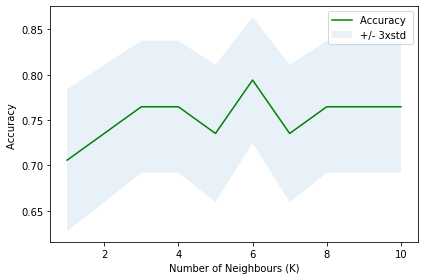

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was", mean_acc.max(), "with k =", mean_acc.argmax()+1)

The best accuracy was 0.7941176470588235 with k = 6


In [ ]:
neigh = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(X_train, y_train)

## SVM

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_svm = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

       False       0.75      1.00      0.86        21
        True       1.00      0.46      0.63        13

    accuracy                           0.79        34
   macro avg       0.88      0.73      0.74        34
weighted avg       0.85      0.79      0.77        34



## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lambdas = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
mean_acc = np.zeros(len(lambdas))

i = 0
for l in lambdas:
    if l == 0:
        c = 1000000
    else:
        c = 1/l

    LR = LogisticRegression(C=c, solver='liblinear').fit(X_train, y_train)
    y_pred_lr = LR.predict(X_test)

    mean_acc[i] = metrics.accuracy_score(y_test, y_pred_lr)
    i = i+1
mean_acc

array([0.73529412, 0.73529412, 0.73529412, 0.73529412, 0.70588235,
       0.76470588, 0.76470588, 0.76470588, 0.76470588, 0.76470588])

In [ ]:
best_lambda = lambdas[mean_acc.argmax()]

if best_lambda == 0:
    best_c = 1000000
else:
    best_c = 1/l

In [ ]:
print("The best accuracy was", mean_acc.max(), "with C =", best_c)

The best accuracy was 0.7647058823529411 with C = 0.1


In [ ]:
LR = LogisticRegression(C=best_c, solver='liblinear').fit(X_train, y_train)
y_pred_lr = LR.predict(X_test)

In [ ]:
y_pred_lr_proba = LR.predict_proba(X_test)

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred_lr_proba)

0.5468782107836523

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(criterion="entropy")
tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, tree.predict(X_test)))

DecisionTrees's Accuracy:  0.6470588235294118


# Model Evaluation using Test set
In this block we should validate our model with unseen data by the model. But since we do not have this data we are going to compare the performance of each model with the current test set.

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [ ]:
print ("Jaccard simmilarity for KNN with 3 nearest neighbours is", jaccard_score(y_test, neigh.predict(X_test)))
print ("F1 Score for KNN with 3 nearest neighbours if", f1_score(y_test, neigh.predict(X_test), average='weighted'))

Jaccard simmilarity for KNN with 3 nearest neighbours is 0.46153846153846156
F1 Score for KNN with 3 nearest neighbours if 0.7708978328173375


In [ ]:
print ("Jaccard simmilarity for SVM is", jaccard_score(y_test, clf.predict(X_test)))
print ("F1 Score for SVM is", f1_score(y_test, clf.predict(X_test), average='weighted'))

Jaccard simmilarity for SVM is 0.46153846153846156
F1 Score for SVM is 0.7708978328173375


In [ ]:
print ("Jaccard simmilarity for Logistic Regression with C = 0.1 is", jaccard_score(y_test, LR.predict(X_test)))
print ("F1 Score for Logistic Regression with C = 0.1 is", f1_score(y_test, LR.predict(X_test), average='weighted'))
print ("Log Loss for Logistic Regression with C = 0.1 is", log_loss(y_test, LR.predict_proba(X_test)))

Jaccard simmilarity for Logistic Regression with C = 0.1 is 0.4666666666666667
F1 Score for Logistic Regression with C = 0.1 is 0.7535456870495234
Log Loss for Logistic Regression with C = 0.1 is 0.5468782107836523


In [ ]:
print ("Jaccard simmilarity for Decision Tree is", jaccard_score(y_test, tree.predict(X_test)))
print ("F1 Score for Decision Tree is", f1_score(y_test, tree.predict(X_test), average='weighted'))

Jaccard simmilarity for Decision Tree is 0.4
F1 Score for Decision Tree is 0.6508403361344538


As we can see the performance is not very good. This can be improved by selecting a better training set. Let's for example take the SVM model and train it with different data to see if the performance changes.

In [ ]:
import random

random_states = [random.randint(0, 10000) for i in range(1000)]
performance = {}

for random_state in random_states:

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

  y_train_split = np.unique(y_train, return_counts=True)
  y_test_split = np.unique(y_test, return_counts=True)

  X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
  X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

  clf.fit(X_train, y_train)
  y_pred_svm = clf.predict(X_test)

  performance[random_state] = f1_score(y_test, clf.predict(X_test), average='weighted')

In [ ]:
import operator
best_split = max(performance.items(), key=operator.itemgetter(1))[0]
print ("F1 Score for SVM is", performance[best_split])

F1 Score for SVM is 0.938631221719457


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=best_split)
y_train_split = np.unique(y_train, return_counts=True)
y_test_split = np.unique(y_test, return_counts=True)

print('Number of fraudulent customers in train set is', y_train_split[1][1], '/',  y_train.shape[0])
print('Number of fraudulent customers in test set is', y_test_split[1][1], '/',  y_test.shape[0])

X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)

print ("Jaccard simmilarity for SVM is", jaccard_score(y_test, clf.predict(X_test)))
print ("F1 Score for SVM is", f1_score(y_test, clf.predict(X_test), average='weighted'))

Number of fraudulent customers in train set is 52 / 134
Number of fraudulent customers in test set is 9 / 34
Jaccard simmilarity for SVM is 0.7777777777777778
F1 Score for SVM is 0.938631221719457


We obtained a F1 score of 0.93 and a Jaccard simmilarity of 0.77 with this particular data split, which seems a very good result. Finally the model needs to be checked with another dataset.